# Stock Market Predictor

# EDA

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl


In [25]:
data = quandl.get("NSE/TATAGLOBAL")

In [26]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


In [30]:
data.shape

(2100, 7)

### Skewness

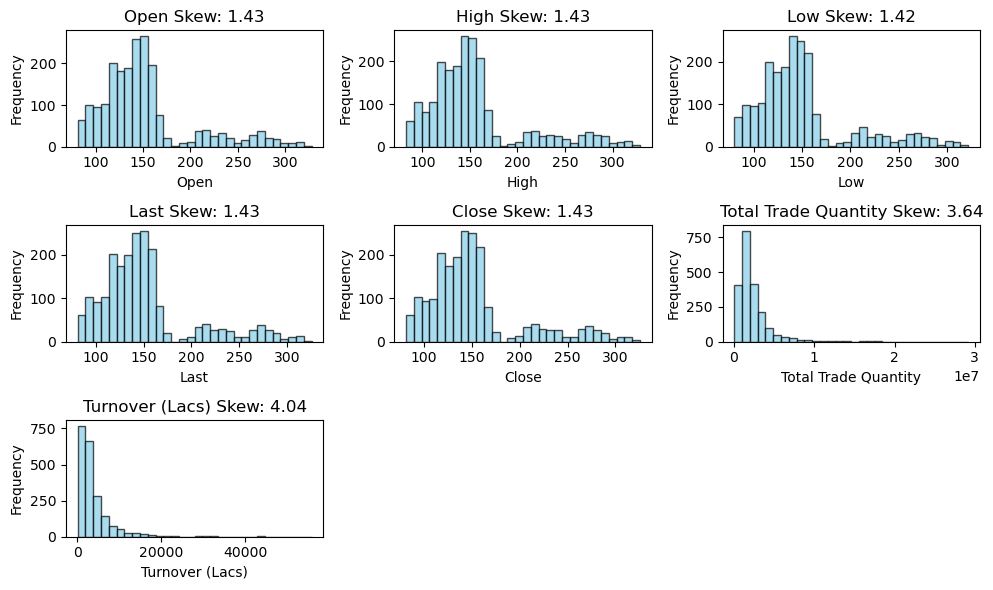

In [29]:

skewness = data.skew()
plt.figure(figsize=(10, 6))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'{column} Skew: {skewness[column]:.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Closing Price Trends Over the Years

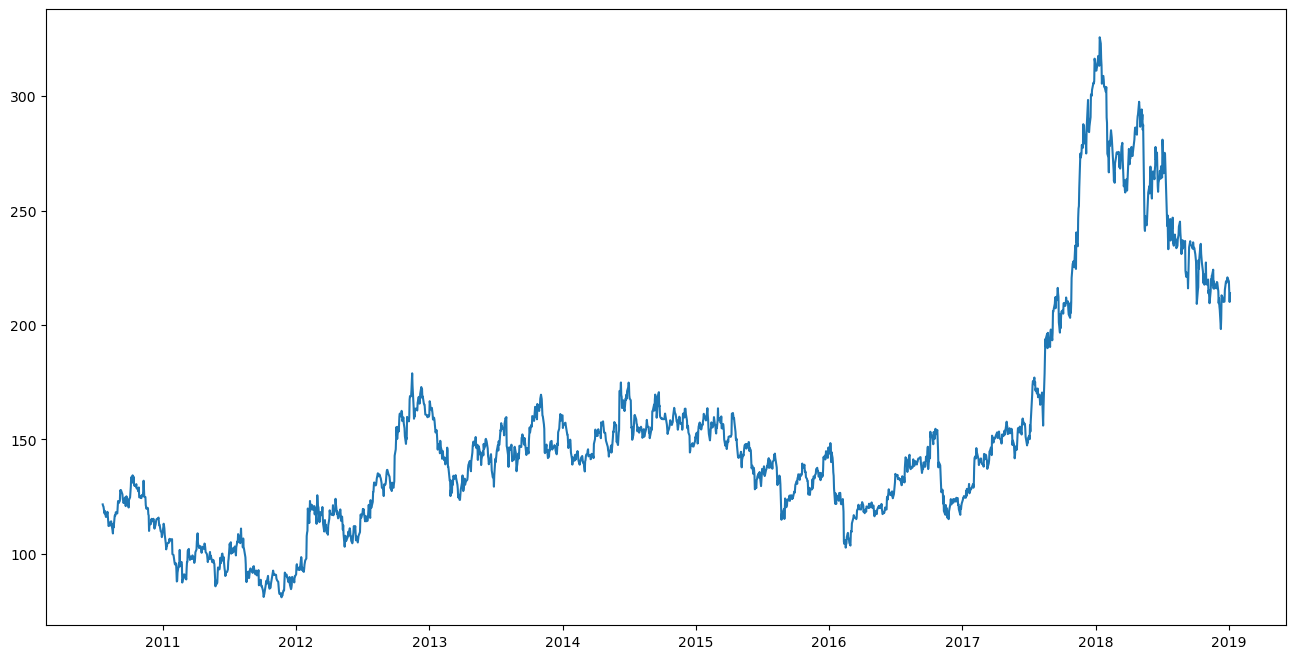

In [4]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label = 'Closing Price')

Correlation Matrix:
            High     Close
High   1.000000  0.999197
Close  0.999197  1.000000


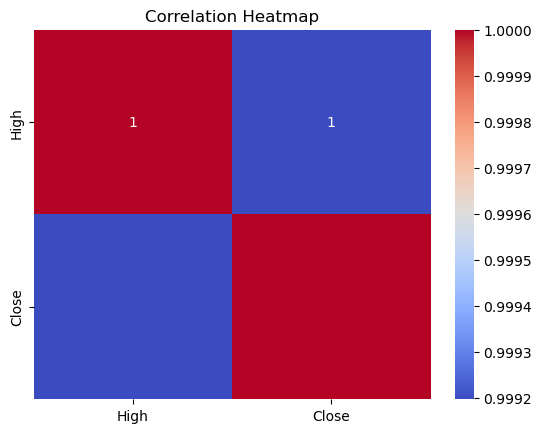

In [33]:
import seaborn as sns

# Correlation analysis
correlation_matrix = data[['High', 'Close']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation Matrix:
           Open      High
Open  1.000000  0.998996
High  0.998996  1.000000


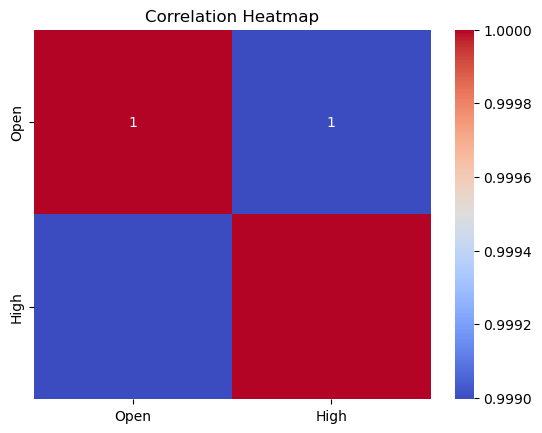

In [34]:
correlation_matrix = data[['Open', 'High']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation Matrix:
            Open     Close
Open   1.000000  0.997841
Close  0.997841  1.000000


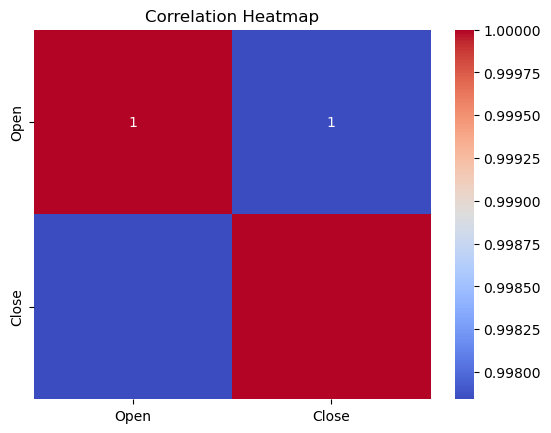

In [35]:
correlation_matrix = data[['Open', 'Close']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

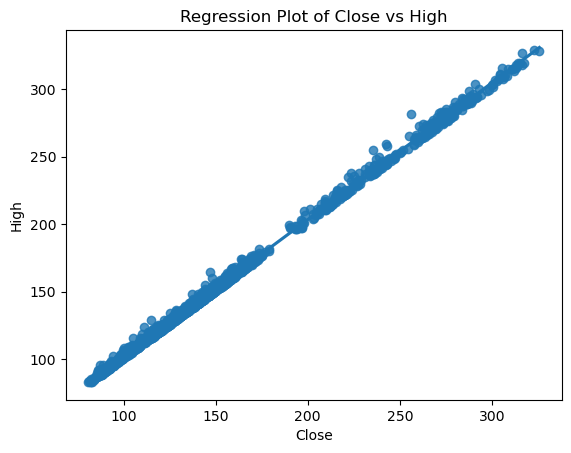

In [37]:
sns.regplot(x='Close', y='High', data=data)
plt.title('Regression Plot of Close vs High')
plt.xlabel('Close')
plt.ylabel('High')
plt.show()

# Feature Engineering

In [5]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data.dropna()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Open - Close,High - Low
Date,,,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666.0,803.56,0.55,1.95
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17,-0.60,1.75
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31,1.15,1.70
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01,2.50,3.90
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98,-1.05,7.50
...,...,...,...,...,...,...,...,...,...
2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09,2.60,4.80
2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63,0.85,3.00
2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31,4.40,6.75


### Splitting Data into Training and Testing

In [6]:
X= data[['Open - Close','High - Low']]
X.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [7]:
y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [8]:
y

array([-1, -1, -1, ..., -1,  1, -1])

# Training KNN Model

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

# Model Analysis

### Model Accuracy

In [19]:
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print(f'train accuracy {accuracy_train}')
print(f'test accuracy {accuracy_test}')

train accuracy 0.7441269841269841
test accuracy 0.4895238095238095


In [15]:
X_test

,Open - Close,High - Low
Date,,
2011-08-17,2.75,4.45
2012-12-06,1.20,2.95
2017-12-05,-0.55,5.60
2010-11-25,8.55,11.25
2014-11-07,-3.00,4.50
...,...,...
2010-07-30,0.45,3.40
2015-01-09,-1.10,4.40
2013-08-05,7.00,7.70


### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[132 146]
 [122 125]]


In [16]:
input_data = np.array([0.55, 2.34]).reshape(1, -1)

prediction = model.predict(input_data)

print(prediction)

[1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Exporting the Model

In [17]:
import pickle

model_file_path = 'knn_model.pkl'

# Export the trained model using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)

print("Model exported successfully.")

Model exported successfully.
